<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Модель-дерева-решений" data-toc-modified-id="Модель-дерева-решений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модель дерева решений</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Модель-логистической-регресии" data-toc-modified-id="Модель-логистической-регресии-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель логистической регресии</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

## Подготовка данных

In [ ]:
!pip install scikit-learn==1.1.3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder
)
from sklearn.utils import shuffle
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    f1_score,
    recall_score
)

# импортируем библиотеки

In [ ]:
plt.style.use('seaborn')
params = {
          'axes.titlesize': 16,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16,
          'axes.labelsize': 16
          }
plt.rcParams.update(params)

In [ ]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [ ]:
data.info() # у нас есть 10000 записей и только в tunure есть пропуски 981 природа пропусков неясна удалим данные строки

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


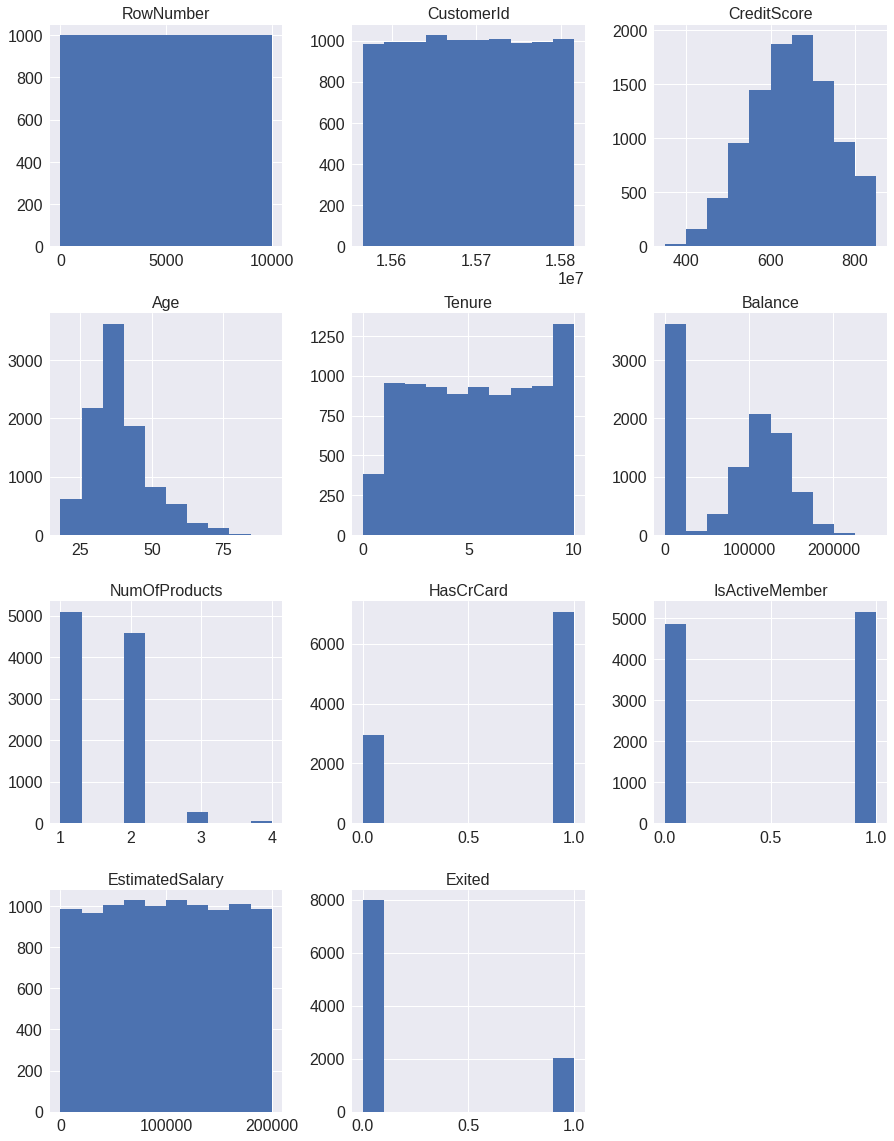

In [ ]:
data.hist(bins=10, figsize=(15, 20));

In [ ]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1) # удалим данные столбцы они не помогут в анализе и тестировании модели

In [ ]:
def rename(name):
  name = name.replace(name[0], name[0].lower())
  for i in range(len(name)):
    if name[i].isupper():
      index = name.find(name[i])
      name = name.replace(name[i], name[i].lower())
      name = name[:index] + '_' + name[index:]
  return name

for i in range(len(data.columns)):
  x=data.columns[i]
  x2=rename(x)
  data = data.rename(columns={x:x2})

In [ ]:
data = data.dropna(subset=['tenure'])
data.isna().sum() # проверим, что пропуски убрали

credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

In [ ]:
data.head(10)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [ ]:
target = data['exited'] # извлекаем признаки и целевой признак
features = data.drop('exited', axis=1)

In [ ]:
features_data, features_test, target_data, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345, stratify=target)

In [ ]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_data, target_data, test_size=0.25, random_state=12345, stratify=target_data)

In [ ]:
# Мы разделили наши данные на соотношение (3,1,1)
print('Размер обучающей выборки:',features_train.shape[0])
print('Размер валидационной выборки:',features_valid.shape[0])
print('Размер тестирующей выборки:',features_test.shape[0])

Размер обучающей выборки: 5454
Размер валидационной выборки: 1818
Размер тестирующей выборки: 1819


<div class="alert alert-info"><b>
Применим OneHotEncoder с нужными параметрами.
<b>
</div>  

In [ ]:
numeric = ['credit_score', 'age', 'tenure', 'num_of_products', 'balance',
           'has_cr_card', 'is_active_member', 'estimated_salary'] # Масштабируем признаки
objects = ['geography','gender']

In [ ]:
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

# обучаем энкодер на заданных категориальных признаках тренировочной выборки
encoder_ohe.fit(features_train[objects])

# добавляем закодированные признаки в features_train
# encoder_ohe.get_feature_names_out() позволяет получить названия колонок
features_train[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_train[objects])

# удаляем незакодированные категориальные признаки (изначальные колонки)
features_train = features_train.drop(objects, axis=1)

In [ ]:
# для features_valid
encoder_ohe.fit(features_valid[objects])
features_valid[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_valid[objects])
features_valid = features_valid.drop(objects, axis=1)
# для features_test
encoder_ohe.fit(features_test[objects])
features_test[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_test[objects])
features_test = features_test.drop(objects, axis=1)

In [ ]:
features_train.head() # проверяем результат

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
3105,678,28,4.0,0.00,2,1,1,144423.17,0.0,0.0,0.0
4900,735,41,7.0,179904.00,1,1,1,137180.95,0.0,0.0,1.0
9400,639,31,3.0,98360.03,1,0,0,20973.80,0.0,0.0,0.0
1760,521,38,5.0,110641.18,1,0,1,136507.69,0.0,0.0,1.0
6322,735,50,2.0,0.00,2,0,1,147075.69,0.0,0.0,1.0


In [ ]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [ ]:
features_train.head() # проверяем результат

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
3105,0.273332,-1.028943,-0.344468,-1.224804,0.790519,0.643184,0.967169,0.776365,0.0,0.0,0.0
4900,0.867258,0.197898,0.688936,1.669480,-0.916326,0.643184,0.967169,0.650528,0.0,0.0,1.0
9400,-0.133038,-0.745826,-0.688936,0.357605,-0.916326,-1.554765,-1.033946,-1.368629,0.0,0.0,0.0
1760,-1.362568,-0.085219,0.000000,0.555184,-0.916326,-1.554765,0.967169,0.638830,0.0,0.0,1.0
6322,0.867258,1.047250,-1.033403,-1.224804,0.790519,-1.554765,0.967169,0.822454,0.0,0.0,1.0


На текущем шаге, мы подготовили данные для дальнейшего исследования. Мы сделали:
- Избавились от пропусков
- Разделили данные на выборки
- Избавились от Дамми-ловушки
- Промасштабировали признаки.

## Исследование задачи

На данном этапе мы будем искать лучшую модель, которая покажет предельно большое значение F1-меры. без борьбы с дисбалансом

### Модель дерева решений

In [ ]:
parametrs = {'max_depth' :range(2,10),
             'min_samples_leaf' : range(1,6),
             'min_samples_split' : range(2,6)
            }
# Исследуем гиперпараметры модели дерева решений.

In [ ]:
best_model = None
best_accuracy = 0
best_f1 = 0
best_auc_roc = 0
best_split = 0
best_leaf = 0
best_depth = 0
for depth in range(1, 12):
    for leaf in range (1, 6):
        for split in range (2, 6):
            model = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=leaf, min_samples_split=split)
            model.fit(features_train, target_train)
            predicted_valid = model.predict(features_valid)
            accuracy = accuracy_score(target_valid, predicted_valid)
            probabilities_valid = model.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]
            auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
            f1 = f1_score(target_valid, predicted_valid)
            if f1 > best_f1:
                best_model = model
                best_accuracy = accuracy
                best_f1 = f1
                best_auc_roc = auc_roc
                best_split = split
                best_leaf = leaf
                best_depth = depth
print("Наилучшей результат f1:", best_f1)
print("Наилучшей результат accuracy:", best_accuracy)
print("Наилучшей результат auc_roc:", best_auc_roc)
print("Максимальная глубина:", depth)
print("Минимальное число объектов в узле:", best_split)
print('Минимальное число объектов в листьях дерева:', best_leaf)

Наилучшей результат f1: 0.5636363636363636
Наилучшей результат accuracy: 0.8415841584158416
Наилучшей результат auc_roc: 0.7965732615300363
Максимальная глубина: 11
Минимальное число объектов в узле: 2
Минимальное число объектов в листьях дерева: 5


Получили самый лучший результат f1: 0.5636 При значений параметров max_depth = 11, min_samples_leaf = 5, min_samples_split = 2

### Модель случайного леса

In [ ]:
# Модель случайного леса.
best_model = None
best_accuracy = 0
best_f1 = 0
best_auc_roc = 0
best_est = 0
best_depth = 0
best_split = 0
for est in range(10, 100, 10):
    for depth in range (1, 11):
        for split in range (2, 6):
            model = RandomForestClassifier(random_state=12345,n_estimators=est, max_depth=depth, min_samples_split=split)
            model.fit(features_train, target_train) # обучaeм модель на тренировочной выборке
            predicted_valid = model.predict(features_valid)
            accuracy = accuracy_score(target_valid, predicted_valid)
            probabilities_valid = model.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]
            auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
            f1 = f1_score(target_valid, predicted_valid)
            if f1 > best_f1:
                best_model = model
                best_accuracy = accuracy
                best_f1 = f1
                best_auc_roc = auc_roc
                best_est = est
                best_split = split
                best_depth = depth

print("Наилучшей результат f1:", best_f1)
print("Наилучшей результат accuracy:", best_accuracy)
print("Наилучшей результат auc_roc:", best_auc_roc)
print("Количество деревьев:", best_est)
print("Максимальная глубина:", best_depth)
print('Минимальное число объектов в листьях дерева:', best_split)

Наилучшей результат f1: 0.5719237435008666
Наилучшей результат accuracy: 0.8641364136413642
Наилучшей результат auc_roc: 0.8458815245595963
Количество деревьев: 10
Максимальная глубина: 9
Минимальное число объектов в листьях дерева: 3


При исследовании гиперпараметров модели случайного леса. Самый лучший результат f1 при n_estimators = 10, max_depth = 9, min_samples_split = 3

### Модель логистической регресии

In [ ]:
# Модель логистической регресии
best_model = None
best_accuracy = 0
best_f1 = 0
best_auc_roc = 0
best_c = 0
for c in np.arange(0.5, 3.0, 0.02):
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=100, C=c)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predicted_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
                best_model = model
                best_accuracy = accuracy
                best_f1 = f1
                best_auc_roc = auc_roc
                best_c = c

print("Наилучшей результат f1:", f1)
print("Наилучшей результат accuracy:", accuracy)
print("Наилучшей результат auc_roc:", auc_roc)
print("Значение C:", c)

Наилучшей результат f1: 0.2828282828282828
Наилучшей результат accuracy: 0.8047304730473047
Наилучшей результат auc_roc: 0.7576787740040273
Значение C: 2.980000000000002


В ходе исследования выяснилось, что логистическая регрессия показала самый худший результат.

Мы выяснили, что модель случайного леса дала лучший результат, проверим как покажет модели при отсутствия дисбаланса.

## Борьба с дисбалансом

У нас есть три решения борьбы с дисбалансом:
- Уменьшение выборки
- Увеличение выборки
- Взвешивание классов
Применим каждый из методов к случайному лесу. При параметрах, которые получили в ходе исследования.

### Взвешивание классов

In [ ]:
best_model = None
best_accuracy = 0
best_f1 = 0
best_auc_roc = 0
best_est = 0
best_depth = 0
best_split = 0
for est in range(10, 100, 10):
    for depth in range (1, 11):
        for split in range (2, 6):
            model = RandomForestClassifier(random_state=12345,n_estimators=est, max_depth=depth,
                                           min_samples_split=split, class_weight='balanced')
            model.fit(features_train, target_train) # обучaeм модель на тренировочной выборке
            predicted_valid = model.predict(features_valid)
            accuracy = accuracy_score(target_valid, predicted_valid)
            probabilities_valid = model.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]
            auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
            f1 = f1_score(target_valid, predicted_valid)
            if f1 > best_f1:
                best_model = model
                best_accuracy = accuracy
                best_f1 = f1
                best_auc_roc = auc_roc
                best_est = est
                best_split = split
                best_depth = depth

print("Наилучшей результат f1:", best_f1)
print("Наилучшей результат accuracy:", best_accuracy)
print("Наилучшей результат auc_roc:", best_auc_roc)
print("Количество деревьев:", best_est)
print("Максимальная глубина:", best_depth)
print('Минимальное число объектов в листьях дерева:', best_split)


Наилучшей результат f1: 0.6210526315789474
Наилучшей результат accuracy: 0.8415841584158416
Наилучшей результат auc_roc: 0.860780832915764
Количество деревьев: 20
Максимальная глубина: 10
Минимальное число объектов в листьях дерева: 2


При взвешении классов получили значение **f1: 0.62105 и auc_roc: 0.8607**, результат улучшили. Напомним, что **лучший результат**, без борьбы дисбаланса **f1: 0.5719 и auc_roc: 0.84588**. При параметрах n_estimators = 20, max_depth = 10, min_samples_split = 2

Стоит отметить, что auc_roc показал снижение или колеблется в районе 0.8607.

### Увеличение выборки

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

In [ ]:
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]
print(target_zeros.shape)
print(target_ones.shape)# Узнаем сколько в каждой из выборок, чтобы выяснить repeat

(4342,)
(1112,)


In [ ]:
best_model = None
best_accuracy = 0
best_f1 = 0
best_auc_roc = 0
best_value = 0
best_est = 0
best_depth = 0
for est in range(10, 100, 10):
    for depth in range (1, 11):
        for value in range(2,10):
            features_upsampled, target_upsampled = upsample(features_train, target_train, value)
            model = RandomForestClassifier(random_state=12345,n_estimators=est, max_depth=depth)
            model.fit(features_upsampled, target_upsampled) # обучaeм модель на тренировочной выборке
            predicted_valid = model.predict(features_valid)
            accuracy = accuracy_score(target_valid, predicted_valid)
            probabilities_valid = model.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]
            auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
            f1 = f1_score(target_valid, predicted_valid)
            if f1 > best_f1:
                best_model = model
                best_accuracy = accuracy
                best_f1 = f1
                best_auc_roc = auc_roc
                best_value = value
                best_est = est
                best_depth = depth

print("Наилучшей результат f1:", best_f1)
print("Наилучшей результат accuracy:", best_accuracy)
print("Наилучшей результат auc_roc:", best_auc_roc)
print("Количество деревьев:", best_est)
print("Максимальная глубина:", best_depth)
print("Наилучшей результат repeat:", best_value)

Наилучшей результат f1: 0.6139088729016786
Наилучшей результат accuracy: 0.8228822882288229
Наилучшей результат auc_roc: 0.8630329131561348
Количество деревьев: 70
Максимальная глубина: 10
Наилучшей результат repeat: 4


При увеличении выборки получили значение **f1: 0.6139 и auc_roc: 0.863**, результат улучшили.

При параметрах n_estimators = 70, max_depth = 10, repeat = 4.

Без борьбы дисбаланса **f1: 0.5719 и auc_roc: 0.84588**.

### Уменьшение выборки

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

In [ ]:
best_model = None
best_accuracy = 0
best_f1 = 0
best_auc_roc = 0
best_value = 0
best_est = 0
best_depth = 0
for est in range(10, 100, 10):
    for depth in range (1, 11):
        for value in np.arange(0.2, 0.8, 0.05):
            features_downsampled, target_downsampled = downsample(features_train, target_train, value)

            model = RandomForestClassifier(random_state=12345,n_estimators=est, max_depth=depth)
            model.fit(features_downsampled, target_downsampled) # обучaeм модель на тренировочной выборке

            predicted_valid = model.predict(features_valid)
            accuracy = accuracy_score(target_valid, predicted_valid)
            probabilities_valid = model.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]
            auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
            f1 = f1_score(target_valid, predicted_valid)
            if f1 > best_f1:
                best_model = model
                best_accuracy = accuracy
                best_f1 = f1
                best_auc_roc = auc_roc
                best_value = value
                best_est = est
                best_depth = depth
print("Наилучшей результат f1:", best_f1)
print("Наилучшей результат accuracy:", best_accuracy)
print("Наилучшей результат auc_roc:", best_auc_roc)
print("Наилучшей результат frac:", best_value)
print("Количество деревьев:", best_est)
print("Максимальная глубина:", best_depth)

Наилучшей результат f1: 0.6184971098265896
Наилучшей результат accuracy: 0.8547854785478548
Наилучшей результат auc_roc: 0.8614477020026563
Наилучшей результат frac: 0.49999999999999994
Количество деревьев: 60
Максимальная глубина: 8


При уменьшении выборки получили значение **f1: 0.6184 и auc_roc: 0.86138**, результат улучшили.

При параметрах n_estimators = 60, max_depth = 8, frac = 0.5.

Без борьбы дисбаланса **f1: 0.5719 и auc_roc: 0.84588**.

Самый лучший результат f1, мы полули при взвешивании классов.

При этом на всем этапе исследования можно заметить, что auc_roc колеблется около 0.861. В сравнении с увеличенной выборкой
auc_roc при уменьшенной выборки уменьшился. Это говорит нам о том, что площадь под прямой становится меньше, ведь мы уменьшили выборку. При этом у нас главная метрика f1 завязана на Recall или Precision.  

## Тестирование модели

In [ ]:
features_data = pd.concat([features_train, features_valid])
target_data = pd.concat([target_train, target_valid]) # Соединим тренировочную + валидационную

In [ ]:
model = model = RandomForestClassifier(random_state=12345,n_estimators=20, max_depth=10,
                                           min_samples_split=2, class_weight='balanced')
model.fit(features_data, target_data) # обучaeм модель на тренировочной выборке + валидационной

predicted_test = model.predict(features_test)
accuracy = accuracy_score(target_test, predicted_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
f1 = f1_score(target_test, predicted_test)
print("Результат f1:", f1)
print("Результат accuracy:", accuracy)
print("Результат auc_roc:", auc_roc)
print("Результат recall:", recall_score(target_test, predicted_test))

Результат f1: 0.6189856957087128
Результат accuracy: 0.8389224848818032
Результат auc_roc: 0.8504676028651843
Результат recall: 0.6415094339622641


На тестовой выборки модель себя показала хорошо, метрики на которые мы ориентируемся, показали рост. f1: 0.6189 и auc_roc: 0.8504.
Подводя итог, мы добились поставленной задачи, а именно довести метрику до 0.59 Лучший результат показали у нас случайный лес + взвешивание классов. Recall составил 0.641.